In [1]:
# project: p9
# submitter: backliwal@wisc.edu
# partner: none

In [2]:
import csv
import copy 
import matplotlib
import pandas

In [3]:
# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [4]:
def get_mapping(path):
    info = {}
    with open(path) as file:
        readFile = csv.reader(file, delimiter=',')
        for row in readFile:
            ID = row[0]
            name = row[1]
            info[ID] = name
    return info

In [5]:
def get_raw_movies(path):
    file = open(path, encoding="utf-8")
    reader = csv.reader(file)
    data = list(reader)
    file.close()
    
    csv_header = data[0]
    csv_data = data[1:]
    
    raw_movies = []
    for i in range(len(csv_data)):
        row = csv_data[i]
        movie_info = {}
        for j in range(len(csv_header)):
            if j == 1:
                movie_info[csv_header[j]] = int(row[j])
            elif j == 2:
                movie_info[csv_header[j]] = float(row[j])
            elif j == 3 or j== 4 or j == 5:
                info_in_list = row[j].split(",")
                movie_info[csv_header[j]] = info_in_list
            else:
                movie_info[csv_header[j]] = row[j]
        raw_movies.append(movie_info)
    return raw_movies

In [6]:
def get_movies(movies_path, mapping_path):
    raw_movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for movie in range(len(raw_movies)):
        raw_movies[movie]["title"] = mapping.get(raw_movies[movie].get("title"))
        for director in range(len(raw_movies[movie].get("directors"))):
            person = mapping.get(raw_movies[movie]["directors"][director])
            raw_movies[movie]["directors"][director] = person
        for actor in range(len(raw_movies[movie].get("actors"))):
            person = mapping.get(raw_movies[movie]["actors"][actor])
            raw_movies[movie]["actors"][actor] = person
    return raw_movies

In [7]:
movies = get_movies("movies.csv", "mapping.csv")

In [8]:
#q1 Find the average rating for movies with less than 4 actors (length of actor list < 4)?
total = 0
count = 0
for i in range(len(movies)):
    if len(movies[i].get("actors")) < 4:
        total += movies[i].get("rating")
        count += 1
total / count

6.380867346938772

In [9]:
#q2 Find the average rating for movies with more than 5 actors (length of actor list > 5) ?
total = 0
count = 0
for i in range(len(movies)):
    if len(movies[i].get("actors")) > 5:
        total += movies[i].get("rating")
        count += 1
total / count

6.742857142857143

In [10]:
#q3 What is the average rating of movies which start with the letter 'a' (case insensitive)?
total = 0
count = 0
for i in range(len(movies)):
    if movies[i].get("title").lower().startswith("a"):
        total += movies[i].get("rating")
        count += 1
total / count

6.413599999999994

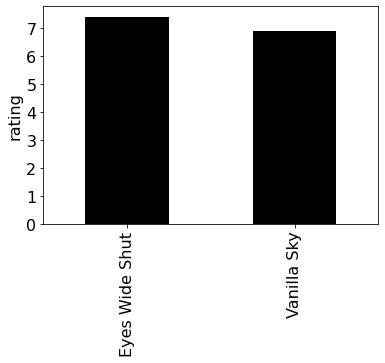

In [11]:
#q4 Plot the title vs rating of movies featuring "Tom Cruise".
cruise_dict = {}
for i in range(len(movies)):
    if "Tom Cruise" in movies[i].get("actors"):
        cruise_dict[movies[i].get("title")] = movies[i].get("rating")
plot_dict(cruise_dict, "rating")

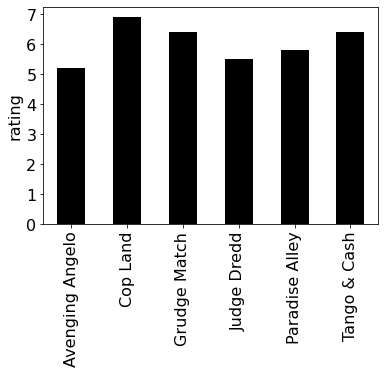

In [12]:
#q5 Plot the title vs rating of movies featuring "Sylvester Stallone".
stallone_dict = {}
for i in range(len(movies)):
    if "Sylvester Stallone" in movies[i].get("actors"):
        stallone_dict[movies[i].get("title")] = movies[i].get("rating")
plot_dict(stallone_dict, "rating")

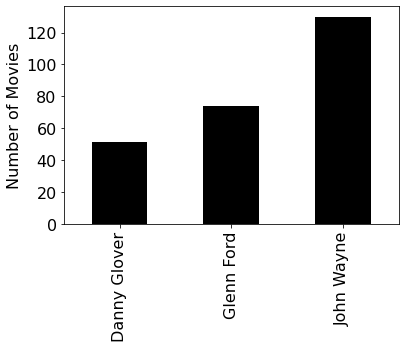

In [13]:
#q6 Plot the number of movies played by ["John Wayne", "Glenn Ford", "Danny Glover"].
num_movies = {}
wayne_count = 0
ford_count = 0
glover_count = 0
for i in range(len(movies)):
    if "John Wayne" in movies[i].get("actors"):
        if "John Wayne" not in num_movies:
            num_movies["John Wayne"] = 1
        else:
            num_movies["John Wayne"] += 1
    if "Glenn Ford" in movies[i].get("actors"):
        if "Glenn Ford" not in num_movies:
            num_movies["Glenn Ford"] = 1
        else:
            num_movies["Glenn Ford"] += 1
    if "Danny Glover" in movies[i].get("actors"):
        if "Danny Glover" not in num_movies:
            num_movies["Danny Glover"] = 1
        else:
            num_movies["Danny Glover"] += 1
plot_dict(num_movies, "Number of Movies")

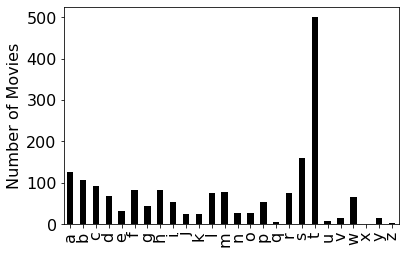

In [14]:
#q7 Plot the number of movies that start with each letter of the alphabet.
letters = "abcdefghijklmnopqrstuvwxyz"
letter_to_num_movies = {}
for letter in letters:
    letter_to_num_movies[letter] = 0
    for i in range(len(movies)):
        if movies[i].get("title").lower().startswith(letter):
            letter_to_num_movies[letter] += 1
plot_dict(letter_to_num_movies, "Number of Movies")

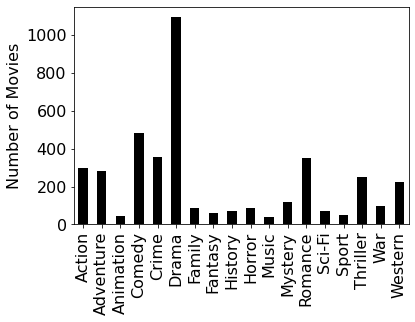

In [15]:
#q8: Plot the number of movies there are for each genre.
genre_to_num_movies = {}

for movie in movies:
    for genre in movie['genres']:
        if genre not in genre_to_num_movies:
            genre_to_num_movies[genre] = 1
        else:
            genre_to_num_movies[genre] += 1
plot_dict(genre_to_num_movies, "Number of Movies")

In [16]:
#q9 For each letter of the alphabet (except 'x'), what is the average rating of movies that start with that letter (case insensitive)?
letters = "abcdefghijklmnopqrstuvwyz" # No x this time!
letter_to_num_movies = {}
for letter in letters:
    letter_to_num_movies[letter] = 0
    ratings = []
    for movie in movies:
        if movie["title"].lower().startswith(letter):
            ratings.append(movie["rating"])
    letter_to_num_movies[letter] = sum(ratings) / len(ratings)
letter_to_num_movies

{'a': 6.413599999999994,
 'b': 6.312264150943395,
 'c': 6.337362637362637,
 'd': 6.297101449275363,
 'e': 6.128125000000001,
 'f': 6.375609756097562,
 'g': 6.443181818181819,
 'h': 6.476829268292684,
 'i': 6.714814814814817,
 'j': 6.375,
 'k': 6.316666666666666,
 'l': 6.172368421052631,
 'm': 6.650000000000002,
 'n': 6.348148148148147,
 'o': 6.5814814814814815,
 'p': 6.160377358490566,
 'q': 6.7,
 'r': 6.371052631578949,
 's': 6.216352201257862,
 't': 6.5432000000000015,
 'u': 6.15,
 'v': 6.1000000000000005,
 'w': 6.243076923076923,
 'y': 6.285714285714286,
 'z': 6.833333333333333}

In [17]:
#q10 What is the average movie rating for each genre?
genre_to_avg_rating = {}
for movie in movies:
    ratings = []
    for genre in movie["genres"]:
        if genre not in genre_to_avg_rating:
            genre_to_avg_rating[genre] = 0
        genre_to_avg_rating[genre] += movie["rating"]
for key in genre_to_avg_rating:
    genre_to_avg_rating[key] = genre_to_avg_rating[key] / genre_to_num_movies[key]
        
genre_to_avg_rating

{'Comedy': 6.3146391752577395,
 'Drama': 6.529707495429615,
 'Romance': 6.474147727272729,
 'History': 6.661643835616438,
 'Family': 6.512941176470589,
 'Mystery': 6.275206611570249,
 'Thriller': 5.981999999999998,
 'Action': 6.125752508361202,
 'Crime': 6.355182072829133,
 'Adventure': 6.612367491166079,
 'Western': 6.455309734513275,
 'Music': 6.3947368421052655,
 'Animation': 7.1533333333333315,
 'Sport': 6.527083333333334,
 'Fantasy': 6.405084745762712,
 'War': 6.771717171717175,
 'Sci-Fi': 6.104347826086958,
 'Horror': 5.724705882352941}

In [18]:
#q11 How many movies in each genre have a rating of above 4.0? (rating > 4.0)
genre_above_rating = {}
for movie in movies:
    ratings = []
    for genre in movie["genres"]:
        if genre not in genre_above_rating:
            genre_above_rating[genre] = 0
        if movie["rating"] > 4.0:
            genre_above_rating[genre] += 1
genre_above_rating

{'Comedy': 484,
 'Drama': 1085,
 'Romance': 352,
 'History': 73,
 'Family': 84,
 'Mystery': 117,
 'Thriller': 243,
 'Action': 289,
 'Crime': 351,
 'Adventure': 280,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 47,
 'Fantasy': 58,
 'War': 99,
 'Sci-Fi': 67,
 'Horror': 81}

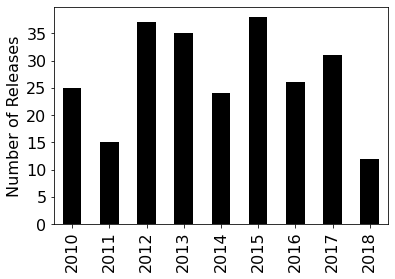

In [19]:
#q12 Plot the number of movies that were released each year in the last decade (2010<= year <=2020)
year_to_num_movies = {}
for movie in movies:
    if movie["year"] >= 2010 and movie["year"] <= 2020:
        if movie["year"] not in year_to_num_movies:
            year_to_num_movies[movie["year"]] = 1
        else:
            year_to_num_movies[movie["year"]] += 1
plot_dict(year_to_num_movies, "Number of Releases")

In [20]:
#q13 Which year (or years) had the highest number of movie releases?
highest_release_years = []
highest = 0
num_releases = {}
for movie in movies:
    if movie["year"] not in num_releases:
        num_releases[movie["year"]] = 1
    else:
        num_releases[movie["year"]] += 1
for year in num_releases:
    if num_releases[year] > highest:
        highest_release_years.clear()
        highest_release_years.append(year)
        highest = num_releases[year]
    elif num_releases[year] == highest:
        highest_release_years.append(year)
        highest = num_releases[year]
highest_release_years

[2015]

In [21]:
#q14 Which 5 genres have the least number of movies?
genre_count = {}
genres = []
for movie in movies:
    ratings = []
    for genre in movie["genres"]:
        if genre not in genres:
            genres.append(genre)
        if genre not in genre_count:
            genre_count[genre] = 1
        else:
            genre_count[genre] += 1

def genre_sort(genre_name):
    return genre_count[genre_name]

sorted(genres, key = genre_sort)[:5]

['Music', 'Animation', 'Sport', 'Fantasy', 'Sci-Fi']

In [22]:
#q15 Which 5 genres have the most number of movies?
sorted(genres, key = genre_sort)[-5:]

['Action', 'Romance', 'Crime', 'Comedy', 'Drama']

In [23]:
#q16 Which 10 actors are featured in the most movies?
actor_count = {}
actors = []
for movie in movies:
    ratings = []
    for actor in movie["actors"]:
        if actor not in actors:
            actors.append(actor)
        if actor not in actor_count:
            actor_count[actor] = 1
        else:
            actor_count[actor] += 1

def actor_sort(actor_name):
    return actor_count[actor_name]

sorted(actors, key = actor_sort)[-10:]

['Robert De Niro',
 'Robert Mitchum',
 'Glenn Ford',
 'George Sanders',
 'Randolph Scott',
 'Henry Fonda',
 'Anthony Quinn',
 'Mickey Rooney',
 'Eric Roberts',
 'John Wayne']

In [24]:
#q17 Which actor has played in the greatest number of movies?
sorted(actors, key = actor_sort)[-1]

'John Wayne'

In [25]:
#q18 How many actors have only acted in only 1 movie?
count = 0
for actor in actor_count:
    if actor_count[actor] == 1:
        count += 1
count

1926

In [26]:
#q19 What are the titles of the top 3 rated movies in the dataset?
titles = []
title_ratings = {}
for movie in movies:
    if movie not in titles:
        titles.append(movie["title"])
        title_ratings[movie["title"]] = movie["rating"]
def title_rating_sort(title):
    return title_ratings[title]
sorted(titles, key = title_rating_sort)[-3:]

['The Godfather: Part II', 'The Dark Knight', 'The Godfather']

In [27]:
#q20 What are the titles of the bottom 19 rated movies in the dataset?
sorted(titles, key = title_rating_sort)[:19]

['Silk',
 'Stealing Las Vegas',
 'Singularity',
 'Body and Soul',
 'Garden of the Dead',
 'Beyond the Ring',
 "Hitman's Run",
 'Betrayal',
 "Jake's Road",
 'The Trouble with Spies',
 '2 Bedroom 1 Bath',
 'Victim of Desire',
 'Arsenal',
 'Woman of Desire',
 'Sweet Justice',
 'Falcon Beach',
 'The Flying Dutchman',
 'The Mark: Redemption',
 'The Steam Experiment']